In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from imutils import paths
import random

Using TensorFlow backend.


In [2]:
path = '/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset_unico'


In [3]:
data = []
labels = []
inputPaths = sorted(list(paths.list_files(path)))
random.seed(43)
random.shuffle(inputPaths),
for inputPath in inputPaths:
    image = load_img(inputPath, target_size=(64,64))
    image = img_to_array(image)
    data.append(image)

    label = inputPath.split('/')[-2]
    labels.append(label)

In [4]:
print(len(data))
print(len(labels))

5000
5000


In [5]:
data = np.array(data, dtype='f') / 255.
labels = np.array(labels)

In [6]:
print(data.shape)
print(labels[:10])

(5000, 64, 64, 3)
['gato' 'gato' 'gato' 'gato' 'gato' 'cachorro' 'cachorro' 'gato'
 'cachorro' 'cachorro']


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 64, 64, 3)
(1250, 64, 64, 3)
(3750,)
(1250,)


In [8]:
y_train[1]

'cachorro'

 # Normalizando labels


In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [11]:
y_train[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [12]:
x_train[:5]

array([[[[0.19215687, 0.13333334, 0.14509805],
         [0.13725491, 0.09019608, 0.09803922],
         [0.2784314 , 0.23921569, 0.24313726],
         ...,
         [0.70980394, 0.14117648, 0.37254903],
         [0.85882354, 0.05098039, 0.33333334],
         [0.9490196 , 0.04313726, 0.34901962]],

        [[0.21960784, 0.16078432, 0.17254902],
         [0.2627451 , 0.21568628, 0.22352941],
         [0.17254902, 0.13333334, 0.13725491],
         ...,
         [0.24313726, 0.23921569, 0.36078432],
         [0.16078432, 0.3019608 , 0.35686275],
         [0.1882353 , 0.25490198, 0.3254902 ]],

        [[0.27450982, 0.21568628, 0.22745098],
         [0.19607843, 0.14901961, 0.15686275],
         [0.18431373, 0.14509805, 0.14901961],
         ...,
         [0.07058824, 0.28627452, 0.40392157],
         [0.21960784, 0.23137255, 0.4       ],
         [0.20392157, 0.16862746, 0.3529412 ]],

        ...,

        [[0.21176471, 0.16862746, 0.15294118],
         [0.11372549, 0.07058824, 0.05490196]

In [13]:
lb.classes_

array(['cachorro', 'gato'], dtype='<U8')

In [14]:
lb.get_params

<bound method BaseEstimator.get_params of LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)>

In [15]:
import keras.backend as K

In [16]:
K.image_data_format()

'channels_last'

In [17]:
print(x_train.shape)
print(y_train.shape)

(3750, 64, 64, 3)
(3750, 1)


# Gerando imagens

In [45]:
aug = ImageDataGenerator(rotation_range=7,
                               horizontal_flip= True,
                               shear_range= 0.2, 
                               height_shift_range= 0.07,
                               zoom_range= 0.2)

In [46]:
augTest = ImageDataGenerator()

In [47]:
dataset_train = aug.flow(x_train, y_train, batch_size=32)

# Criando modelo e Compilando

In [82]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

In [70]:
from keras.optimizers import SGD, Adam, RMSprop 
from keras.callbacks import LearningRateScheduler


In [71]:
sgd = SGD(lr=0.01, decay=0.0001)

In [72]:
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [73]:
H = model.fit_generator(generator=dataset_train, steps_per_epoch= 125, 
                        epochs= 20, validation_data= augTest.flow(x_test, y_test), validation_steps= 50)

Epoch 1/20
125/125 [==============================] - 156s 1s/step - loss: 0.7267 - acc: 0.5816 - val_loss: 0.6204 - val_acc: 0.6656
Epoch 2/20
125/125 [==============================] - 143s 1s/step - loss: 0.6594 - acc: 0.6288 - val_loss: 0.7018 - val_acc: 0.5688
Epoch 3/20
125/125 [==============================] - 142s 1s/step - loss: 0.6323 - acc: 0.6490 - val_loss: 0.6551 - val_acc: 0.6153
Epoch 4/20
125/125 [==============================] - 144s 1s/step - loss: 0.6149 - acc: 0.6605 - val_loss: 0.6162 - val_acc: 0.6578
Epoch 5/20
125/125 [==============================] - 149s 1s/step - loss: 0.6085 - acc: 0.6708 - val_loss: 0.6255 - val_acc: 0.6503
Epoch 6/20
125/125 [==============================] - 148s 1s/step - loss: 0.5758 - acc: 0.6978 - val_loss: 0.5679 - val_acc: 0.7089
Epoch 7/20
125/125 [==============================] - 145s 1s/step - loss: 0.5733 - acc: 0.6932 - val_loss: 0.5631 - val_acc: 0.7217
Epoch 8/20
125/125 [==============================] - 144s 1s/step - 

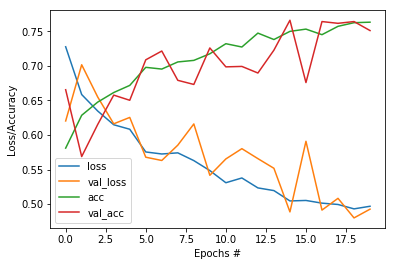

In [74]:
plt.figure()
plt.plot(H.history['loss'], label = 'loss')
plt.plot(H.history['val_loss'], label = 'val_loss')
plt.plot(H.history['acc'], label = 'acc')
plt.plot(H.history['val_acc'], label = 'val_acc')
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [75]:
scores = model.evaluate(x_test, y_test, batch_size=32)
scores

1250/1250 [==============================] - 15s 12ms/step


[0.48531414518356325, 0.7576]

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
preds = model.predict_classes(x_test)

In [78]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       583
           1       0.80      0.72      0.76       667

    accuracy                           0.76      1250
   macro avg       0.76      0.76      0.76      1250
weighted avg       0.76      0.76      0.76      1250



In [79]:
confusion_matrix(y_test, preds)

array([[466, 117],
       [186, 481]])

# Criando e Compilando o modelo

- Aumentando Convoluções de saída

In [83]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(10))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(1, activation = 'sigmoid'))

In [81]:
sgd = SGD(lr=0.01, decay=0.0001)

In [84]:
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [85]:
H2 = model2.fit_generator(generator=dataset_train, steps_per_epoch=125,
                          epochs=20, validation_data=augTest.flow(x_test, y_test), validation_steps= 50)

Epoch 1/20
125/125 [==============================] - 214s 2s/step - loss: 0.7361 - acc: 0.5648 - val_loss: 0.6135 - val_acc: 0.6726
Epoch 2/20
125/125 [==============================] - 200s 2s/step - loss: 0.6839 - acc: 0.6156 - val_loss: 1.0287 - val_acc: 0.5490
Epoch 3/20
125/125 [==============================] - 193s 2s/step - loss: 0.6378 - acc: 0.6552 - val_loss: 0.7054 - val_acc: 0.6312
Epoch 4/20
125/125 [==============================] - 187s 1s/step - loss: 0.6256 - acc: 0.6602 - val_loss: 0.5777 - val_acc: 0.7078
Epoch 5/20
125/125 [==============================] - 194s 2s/step - loss: 0.5968 - acc: 0.6866 - val_loss: 0.5974 - val_acc: 0.6866
Epoch 6/20
125/125 [==============================] - 202s 2s/step - loss: 0.5867 - acc: 0.6856 - val_loss: 0.6270 - val_acc: 0.6484
Epoch 7/20
125/125 [==============================] - 201s 2s/step - loss: 0.5575 - acc: 0.7154 - val_loss: 0.5596 - val_acc: 0.7140
Epoch 8/20
125/125 [==============================] - 202s 2s/step - 

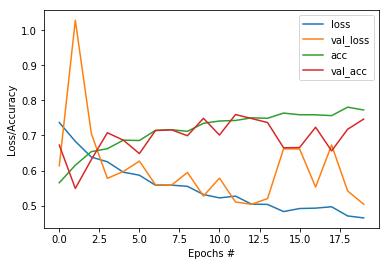

In [86]:
plt.figure()
plt.plot(H2.history['loss'], label='loss')
plt.plot(H2.history['val_loss'], label='val_loss')
plt.plot(H2.history['acc'], label='acc')
plt.plot(H2.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.show()

In [87]:
scores = model2.evaluate(x_test, y_test, batch_size=32)

1250/1250 [==============================] - 20s 16ms/step


In [89]:
scores

[0.5138313446044922, 0.744]

In [91]:
preds = model2.predict_classes(x_test)

In [92]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       583
           1       0.75      0.78      0.76       667

    accuracy                           0.74      1250
   macro avg       0.74      0.74      0.74      1250
weighted avg       0.74      0.74      0.74      1250



In [94]:
confusion_matrix(y_test, preds)

array([[412, 171],
       [149, 518]])

## Criando e Compilando modelo

In [95]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(10))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(1, activation = 'sigmoid'))

In [96]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
H3 = model3.fit_generator(generator=dataset_train, steps_per_epoch=125,
                          epochs=20, validation_data=augTest.flow(x_test, y_test), validation_steps= 50)

Epoch 1/20
125/125 [==============================] - 217s 2s/step - loss: 0.7234 - acc: 0.5876 - val_loss: 0.6898 - val_acc: 0.6287
Epoch 2/20
125/125 [==============================] - 209s 2s/step - loss: 0.6681 - acc: 0.6263 - val_loss: 0.7251 - val_acc: 0.6242
Epoch 3/20
125/125 [==============================] - 199s 2s/step - loss: 0.6568 - acc: 0.6318 - val_loss: 0.8089 - val_acc: 0.5401
Epoch 4/20
125/125 [==============================] - 201s 2s/step - loss: 0.6057 - acc: 0.6738 - val_loss: 0.6043 - val_acc: 0.6753
Epoch 5/20
125/125 [==============================] - 207s 2s/step - loss: 0.5759 - acc: 0.7018 - val_loss: 0.6818 - val_acc: 0.5554
Epoch 6/20
125/125 [==============================] - 183s 1s/step - loss: 0.5589 - acc: 0.7107 - val_loss: 0.7087 - val_acc: 0.6701
Epoch 7/20
125/125 [==============================] - 182s 1s/step - loss: 0.5296 - acc: 0.7442 - val_loss: 0.8671 - val_acc: 0.6484
Epoch 8/20
125/125 [==============================] - 181s 1s/step - 

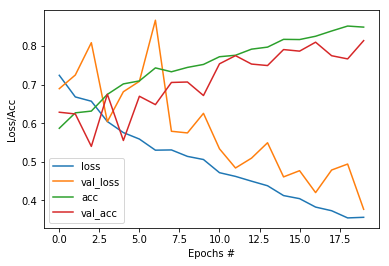

In [98]:
plt.figure()
plt.plot(H3.history['loss'], label='loss')
plt.plot(H3.history['val_loss'], label='val_loss')
plt.plot(H3.history['acc'], label='acc')
plt.plot(H3.history['val_acc'], label='val_acc')
plt.xlabel("Epochs #")
plt.ylabel("Loss/Acc")
plt.legend()
plt.show()

In [99]:
scores = model3.evaluate(x_test,y_test, batch_size=32)

1250/1250 [==============================] - 19s 15ms/step


In [100]:
scores

[0.3773380428791046, 0.816]

In [101]:
preds = model3.predict_classes(x_test)

In [102]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       583
           1       0.84      0.80      0.82       667

    accuracy                           0.82      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.82      0.82      0.82      1250



In [103]:
confusion_matrix(y_test, preds)

array([[484,  99],
       [131, 536]])

#### Teste com nova imagem

In [105]:
imagem_teste = load_img("/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/cachorro.jpg", target_size=(64, 64))

In [106]:
imagem_teste = np.array(imagem_teste) / 255.

In [108]:
imagem_teste = imagem_teste.reshape(1, imagem_teste.shape[0], imagem_teste.shape[1], imagem_teste.shape[2])
model3.predict_classes(imagem_teste)

array([[0]], dtype=int32)

In [113]:
lb.classes_[0]

'cachorro'

#### Teste com nova imagem


In [125]:
imagem_teste2 = load_img("/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/gato.jpg", target_size=(64, 64))

In [126]:
imagem_teste2 = np.array(imagem_teste2) / 255.

In [127]:
imagem_teste2 = imagem_teste2.reshape(1, imagem_teste2.shape[0], imagem_teste2.shape[1], imagem_teste2.shape[2])
model3.predict_classes(imagem_teste2)

array([[1]], dtype=int32)

In [128]:
lb.classes_[1]

'gato'